#1. 전처리


##1.1 CSV 파일 수집

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 위 설치 후 런타임 재시작할 것

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,810 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os
base_path='/content/drive/My Drive/1. 크롤링/'
path_list=[]
path_list.append(base_path+'기현주')
path_list.append(base_path+'김수연')
path_list.append(base_path+'박설하')
path_list.append(base_path+'박윤지')
path_list.append(base_path+'황태웅')
all_reviews = pd.DataFrame()
for path in path_list:
  file_list = os.listdir(path)
  for f in file_list:
    if len(f.split('.')) > 1:
      if f.split('.')[1] =='csv':
        tmp_pd = pd.read_csv(path+'/'+f, encoding='utf8', index_col=False)
        all_reviews = pd.concat([all_reviews, tmp_pd])
all_reviews = all_reviews[['평점','호텔이름','후기']]
all_reviews.reset_index(drop=True, inplace=True)
print(all_reviews)



         평점                   호텔이름   후기
0       NaN  타이베이 라디움 카가야 인터내셔널 호텔  NaN
1       NaN  타이베이 라디움 카가야 인터내셔널 호텔  NaN
2       NaN  타이베이 라디움 카가야 인터내셔널 호텔  NaN
3       NaN  타이베이 라디움 카가야 인터내셔널 호텔  NaN
4       NaN  타이베이 라디움 카가야 인터내셔널 호텔  NaN
...     ...                    ...  ...
43370   4.0                경포 수 호텔  NaN
43371  10.0                경포 수 호텔  NaN
43372  10.0                경포 수 호텔  NaN
43373   6.0                경포 수 호텔  NaN
43374  10.0                경포 수 호텔  NaN

[43375 rows x 3 columns]


## 1.2 Null 제거 및 중복 제거

In [4]:
all_reviews = all_reviews.dropna(axis=0)
all_reviews.reset_index(drop=True, inplace=True)
print(all_reviews)

         평점  ...                                                 후기
0       4.0  ...  가대격비 핵루별 가마지세요 친만절합다니........ 뷰를 중하요게 생각하면 그냥 ...
1      10.0  ...  직원이 매우 친절하고 정성스러웠습니다. 밤에 바람이 많이 불었습니다만, 아주 추운날...
2       8.0  ...  너무나 친절한 직원과 아늑한 객실. 대욕탕에서의 온천은 사람이 거의없어 최고였음. ...
3      10.0  ...  Very much like staying In a good onsen hotel i...
4      10.0  ...  Great service. However, they would charge the ...
...     ...  ...                                                ...
34844  10.0  ...  시설이 깨끗하고 쾌적하며 한옥마을 안에 있어 근접성이 최고. 한복대여점을 문의했더니...
34845  10.0  ...  가족과 편하게 잘쉬고 왔습니다. 방이 크진않지만 아기자기하게 필요한것들은 모두 구비...
34846  10.0  ...        사장님이 정말 친절하시고 신경 많이 써주셔서 편하게 쉬다왔습니다. 강추해요^^
34847  10.0  ...  The Hanok was nicely located in the Hanok vill...
34848  10.0  ...  Owner is friendly and helped us with taxi book...

[34849 rows x 3 columns]


In [5]:
all_reviews.drop_duplicates()

,평점,호텔이름,후기
0,4.0,타이베이 라디움 카가야 인터내셔널 호텔,가대격비 핵루별 가마지세요 친만절합다니........ 뷰를 중하요게 생각하면 그냥 ...
1,10.0,타이베이 라디움 카가야 인터내셔널 호텔,"직원이 매우 친절하고 정성스러웠습니다. 밤에 바람이 많이 불었습니다만, 아주 추운날..."
2,8.0,타이베이 라디움 카가야 인터내셔널 호텔,너무나 친절한 직원과 아늑한 객실. 대욕탕에서의 온천은 사람이 거의없어 최고였음. ...
3,10.0,타이베이 라디움 카가야 인터내셔널 호텔,Very much like staying In a good onsen hotel i...
4,10.0,타이베이 라디움 카가야 인터내셔널 호텔,"Great service. However, they would charge the ..."
...,...,...,...
34844,10.0,한옥혜윰,시설이 깨끗하고 쾌적하며 한옥마을 안에 있어 근접성이 최고. 한복대여점을 문의했더니...
34845,10.0,한옥혜윰,가족과 편하게 잘쉬고 왔습니다. 방이 크진않지만 아기자기하게 필요한것들은 모두 구비...
34846,10.0,한옥혜윰,사장님이 정말 친절하시고 신경 많이 써주셔서 편하게 쉬다왔습니다. 강추해요^^
34847,10.0,한옥혜윰,The Hanok was nicely located in the Hanok vill...


#2. 형태소 분석

In [6]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
     |████████████████████████████████| 3.8MB 56.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [7]:
# 아래 형태소 분석 수행하면 오래걸림 (10분)
from konlpy.tag import Okt
okt = Okt()
tokened_review_list = []
for sentence in all_reviews['후기']:
  tmp_list = [token[0] for token in okt.pos(sentence) if token[1] in ['Noun','Verb']]
  tokened_review_list.append(tmp_list)

print(tokened_review_list[:5])


[['가대', '격비', '핵루별', '가마', '지세', '친', '만절', '합다니', '뷰', '중하', '요게', '생각', '하면', '그냥', '가마', '지세'], ['직원', '매우', '밤', '바람', '불었습니다만', '아주', '추운', '날씨', '운치', '밤', '이었습니다', '열곡', '월요일', '휴무', '보지', '했습니다', '색실', '온천', '물이', '나와서', '별도', '탕', '찾아', '갈', '필요성', '느끼지', '했습니다', '전반', '조식'], ['직원', '객실', '대욕', '탕', '온천', '사람', '거의', '최고', '였음', '조식', '상', '아침', '회도', '나옴'], [], []]


In [8]:
all_reviews['t후기'] = tokened_review_list
print(all_reviews)

         평점  ...                                                t후기
0       4.0  ...  [가대, 격비, 핵루별, 가마, 지세, 친, 만절, 합다니, 뷰, 중하, 요게, 생...
1      10.0  ...  [직원, 매우, 밤, 바람, 불었습니다만, 아주, 추운, 날씨, 운치, 밤, 이었습...
2       8.0  ...  [직원, 객실, 대욕, 탕, 온천, 사람, 거의, 최고, 였음, 조식, 상, 아침,...
3      10.0  ...                                                 []
4      10.0  ...                                                 []
...     ...  ...                                                ...
34844  10.0  ...  [시설, 옥, 마을, 안, 근접, 최고, 복대, 점, 문의, 했더니, 직접, 안내,...
34845  10.0  ...  [가족, 쉬고, 왔습니다, 방이, 크진, 않지만, 들은, 모두, 구비, 되어있고, ...
34846  10.0  ...                     [사장, 정말, 신경, 써주셔서, 쉬, 왔습니다, 강]
34847  10.0  ...                                                 []
34848  10.0  ...                                                 []

[34849 rows x 4 columns]


In [9]:
null_idx = all_reviews['t후기'].map(lambda x: False if len(x) ==0 else True )
idx = null_idx[null_idx == False].index

all_reviews.drop(idx, inplace=True)
print(all_reviews)

         평점  ...                                                t후기
0       4.0  ...  [가대, 격비, 핵루별, 가마, 지세, 친, 만절, 합다니, 뷰, 중하, 요게, 생...
1      10.0  ...  [직원, 매우, 밤, 바람, 불었습니다만, 아주, 추운, 날씨, 운치, 밤, 이었습...
2       8.0  ...  [직원, 객실, 대욕, 탕, 온천, 사람, 거의, 최고, 였음, 조식, 상, 아침,...
50      4.0  ...  [세면대, 벽, 이음, 새, 곰팡이, 자국, 별로, 첵, 크아, 웃도, 하기전, 청...
51      8.0  ...  [시설, 수영장, 사우나, 최고, 대만, 보니, 히터, 잘, 나오지, 않아, 조금,...
...     ...  ...                                                ...
34842  10.0  ...  [사장, 옥, 마을, 구경, 하기엔, 최적, 위치, 였네요, 선택, 한거, 이후, ...
34843  10.0  ...  [옥, 체험, 하고싶어, 정, 곳, 정말, 맘, 속, 들었습니다, 사장, 내외, 정...
34844  10.0  ...  [시설, 옥, 마을, 안, 근접, 최고, 복대, 점, 문의, 했더니, 직접, 안내,...
34845  10.0  ...  [가족, 쉬고, 왔습니다, 방이, 크진, 않지만, 들은, 모두, 구비, 되어있고, ...
34846  10.0  ...                     [사장, 정말, 신경, 써주셔서, 쉬, 왔습니다, 강]

[19230 rows x 4 columns]


In [10]:
pos_reviews = all_reviews[all_reviews['평점'] > 7]
neg_reviews = all_reviews[all_reviews['평점'] <= 7]

print(pos_reviews)
print(neg_reviews)

         평점  ...                                                t후기
1      10.0  ...  [직원, 매우, 밤, 바람, 불었습니다만, 아주, 추운, 날씨, 운치, 밤, 이었습...
2       8.0  ...  [직원, 객실, 대욕, 탕, 온천, 사람, 거의, 최고, 였음, 조식, 상, 아침,...
51      8.0  ...  [시설, 수영장, 사우나, 최고, 대만, 보니, 히터, 잘, 나오지, 않아, 조금,...
52     10.0  ...                               [푹, 쉬, 왔습니다, 룸, 컨디션]
54     10.0  ...                    [손녀, 함께한, 여행, 박, 하며, 스텝, 느꼈습니다]
...     ...  ...                                                ...
34842  10.0  ...  [사장, 옥, 마을, 구경, 하기엔, 최적, 위치, 였네요, 선택, 한거, 이후, ...
34843  10.0  ...  [옥, 체험, 하고싶어, 정, 곳, 정말, 맘, 속, 들었습니다, 사장, 내외, 정...
34844  10.0  ...  [시설, 옥, 마을, 안, 근접, 최고, 복대, 점, 문의, 했더니, 직접, 안내,...
34845  10.0  ...  [가족, 쉬고, 왔습니다, 방이, 크진, 않지만, 들은, 모두, 구비, 되어있고, ...
34846  10.0  ...                     [사장, 정말, 신경, 써주셔서, 쉬, 왔습니다, 강]

[15593 rows x 4 columns]
        평점  ...                                                t후기
0      4.0  ...  [가대, 격비, 핵루별, 가마, 지세, 친, 만절, 합다니, 뷰, 중하, 요게, 생...
50     4.0  ...  [세면대, 벽

In [11]:
neg_word = ''
for review in neg_reviews['t후기']:
  neg_word += " ".join(review)
print(len(neg_word))


327903


In [12]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



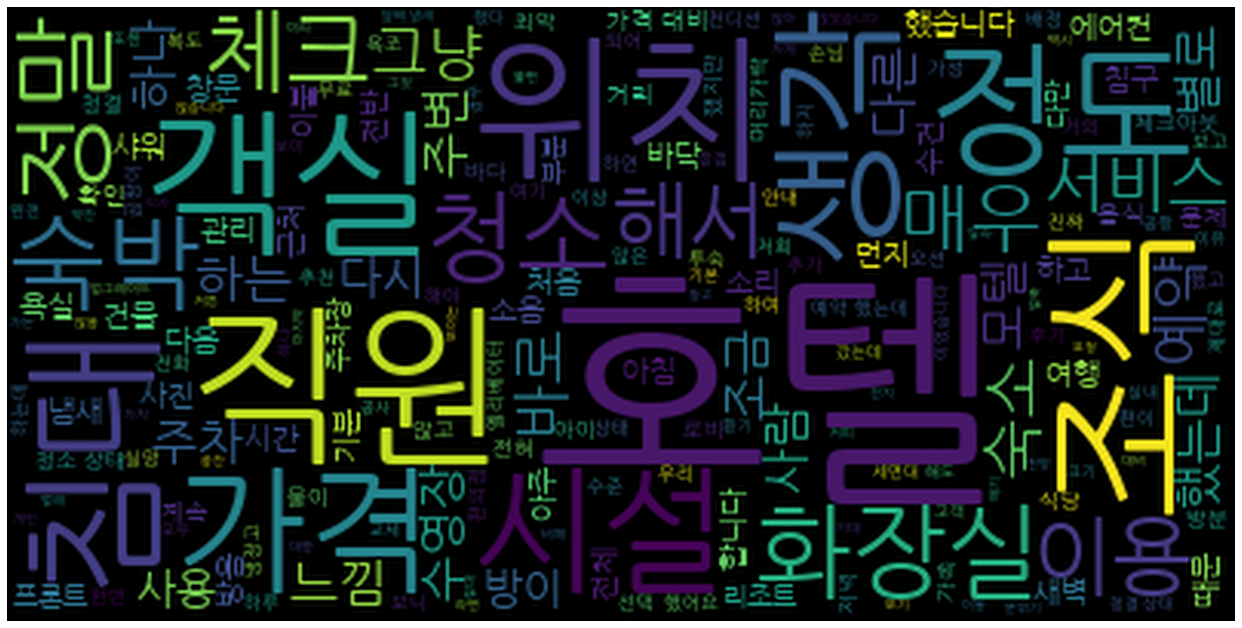

In [13]:
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(neg_word)
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

In [14]:
neg_reviews.groupby('호텔이름').count().sort_values(by='후기', ascending=False)

,평점,후기,t후기
호텔이름,,,
코오롱 씨클라우드 호텔,42,42,42
휘닉스 제주 섭지 코지,39,39,39
현대 수 리조트 속초,34,34,34
샹보르 호텔 (한국),34,34,34
해운대 센텀 호텔,32,32,32
...,...,...,...
프리덤,1,1,1
프레이저 스위트 시드니,1,1,1
아이레스트 아오 낭 씨프런트,1,1,1


In [15]:
hotel_review = all_reviews[(all_reviews['호텔이름'] == '코오롱 씨클라우드 호텔') & (all_reviews['평점'] <= 7)]
print(hotel_review)

        평점  ...                                                t후기
20453  4.0  ...  [위치, 시설, 느낌, 나는데, 관리, 안, 하는, 것, 수건, 숙박, 인원, 준비...
20457  6.0  ...                                           [위치, 비추]
20460  6.0  ...                         [칫솔, 치약, 알았지만, 샴푸, 부분, 생각]
20462  6.0  ...                                           [객실, 내부]
20465  6.0  ...                        [시설, 조금, 노후, 되었습니다, 전망, 위치]
20466  6.0  ...  [레지던스, 호텔, 건데, 주방용품, 준비, 예약, 할, 때, 명, 했는데, 수건,...
20468  2.0  ...  [침대, 욕실, 청소, 제대로, 머리카락, 등, 먼지, 가격, 싸지도, 않은데, 모...
20470  2.0  ...  [매우, 매우, 불만족, 인실인데, 생수, 병, 이상은, 사먹으라고, 하고, 컵, ...
20472  2.0  ...  [급, 호텔, 하기에, 시설, 청결, 서비스, 객실, 내, 비품, 수준, 등, 형편...
20476  2.0  ...  [박, 모두, 청소, 상태, 불, 조식, 서비스, 가니, 음식, 보충, 찌, 끄러,...
20478  6.0  ...    [예전, 갔었던, 기억, 이번, 이용, 했는데, 바닥, 뭘, 쏟은, 얼룩, 그, 외]
20479  6.0  ...  [배, 넘, 개, 차이나는, 가격, 조건, 방, 두번째, 방문, 연말, 가격, 높아...
20480  6.0  ...     [한, 건물, 안, 몇개, 숙박시설, 헤, 갈렸어요, 이름, 체크, 카운트, 혼란]
20481  6.0  ...  [주차장, 객실, 이동, 동선, 및, 회사, 객실, 혼재, 해, 등등, 위치, 장

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori
import networkx as nx

cv = CountVectorizer(max_features=100, min_df = 10)
review_doc_list = []
for review in neg_reviews['t후기']:
  review_doc_list.append(" ".join(review))

cv_result = cv.fit_transform(review_doc_list)
cv_df = pd.DataFrame(cv_result.toarray(), columns = cv.get_feature_names())
print(cv_df)

      가격  가성  가족  객실  거리  건물  곰팡이  관리  ...  합니다  해서  했는데  했습니다  했어요  호텔  화장실  후기
0      0   0   0   0   0   0    0   0  ...    0   0    0     0    0   0    0   0
1      0   0   0   0   0   0    1   0  ...    0   0    0     0    0   0    0   0
2      1   0   0   0   0   0    0   0  ...    0   0    0     0    0   0    0   0
3      0   0   0   0   0   0    0   0  ...    0   0    0     0    0   0    0   0
4      0   0   0   0   0   0    0   1  ...    0   0    0     0    0   4    0   0
...   ..  ..  ..  ..  ..  ..  ...  ..  ...  ...  ..  ...   ...  ...  ..  ...  ..
3632   0   0   0   0   0   0    0   0  ...    1   0    0     0    0   1    0   2
3633   1   0   0   0   0   0    0   0  ...    0   0    0     0    0   0    0   0
3634   0   0   1   0   0   0    0   0  ...    0   0    0     0    0   0    0   0
3635   0   0   0   0   0   0    0   0  ...    0   0    0     0    0   0    0   0
3636   0   0   0   0   0   0    0   0  ...    0   0    0     0    0   0    0   0

[3637 rows x 100 columns]


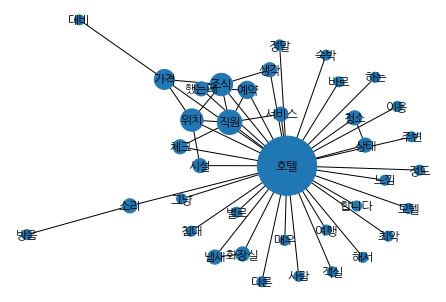

<Figure size 4320x2160 with 0 Axes>

In [17]:
import matplotlib.font_manager as fm
font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=9).get_name()
import matplotlib.pyplot as plt

import numpy as np
for col in cv_df.columns:
  cv_df[col] = np.where(cv_df[col] > 0, True, False)

frequent_itemsets = apriori(cv_df, min_support=0.025, use_colnames=True)

from_List=[]
to_List=[]
for fs in frequent_itemsets['itemsets']:
  if len(fs) == 2:
    from_List.append(list(fs)[0])
    to_List.append(list(fs)[1])
  
networkx_df = pd.DataFrame({'from':from_List, 'to':to_List})
g2 = nx.from_pandas_edgelist(networkx_df, 'from', 'to', create_using=nx.Graph())
d = dict(nx.degree(g2))
nx.draw(g2, with_labels=True, nodelist=d.keys(), node_size=[v * 100 for v in d.values()], font_family=font_name)

plt.figure(figsize=(60, 30))
plt.show()